In [1]:
%matplotlib notebook
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [14]:
"""
  df = pd.read_csv(): Pandas function that allows to read csv file using the URL parameter of the file location.
  df.head(): print the 5 top date of the DataSet 
"""
df = pandas.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
"""
    d1: variable that allows you to specify which values will be changed to numeric values in the gender column.
    d2: variable that allows you to specify which values will be changed to numeric values in the smoker column.
    d3: variable that allows you to specify which values will be changed to numeric values in the region column.
    
    df['something'].map() : performs the mapping in the dataFrame to get values that have been specified in
                            the columns by changing for the declarations.
"""
d1 = {'female':0,'male':1}
df['sex'] = df['sex'].map(d1)
d2 = {'yes':1,'no':0}
df['smoker']= df['smoker'].map(d2)
d3={'southwest':0,'southeast':1,'northwest':2,'northeast':3}
df['region'] = df['region'].map(d3)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [4]:
"""
    X: based on the analysis of the DataSet,
       it corresponds to perform the separation
       of the characteristics by storing them in this variable
"""
features = ['age','sex','bmi','region']
X = df[features]

In [5]:
"""
    y:  based on the analysis of the DataSet
        corresponds to perform the separation
        of the label by storing them in this variable
"""
labels = ['smoker']
y = df[labels]

In [6]:
print(X,y,sep="\n\n")

      age  sex     bmi  region
0      19    0  27.900       0
1      18    1  33.770       1
2      28    1  33.000       1
3      33    1  22.705       2
4      32    1  28.880       2
...   ...  ...     ...     ...
1333   50    1  30.970       2
1334   18    0  31.920       3
1335   18    0  36.850       1
1336   21    0  25.800       0
1337   61    0  29.070       2

[1338 rows x 4 columns]

      smoker
0          1
1          0
2          0
3          0
4          0
...      ...
1333       0
1334       0
1335       0
1336       0
1337       1

[1338 rows x 1 columns]


In [7]:
"""
    DecisionTreeClassifier(): Permite devolver la profundidad del arbol de decisión
    dtree.fit(): entrena el modelo en base a las variables dependientes y independientes
"""
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X,y)

In [8]:
"""
    export_graphviz(): Esta función realiza la exportación del arbol por lo cual 
                       especifica la salida del arbol exportandola como grafica 
    graph: genera la grafica con la data obtenida
    write_png(): exporta la grafica en formato png
"""
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


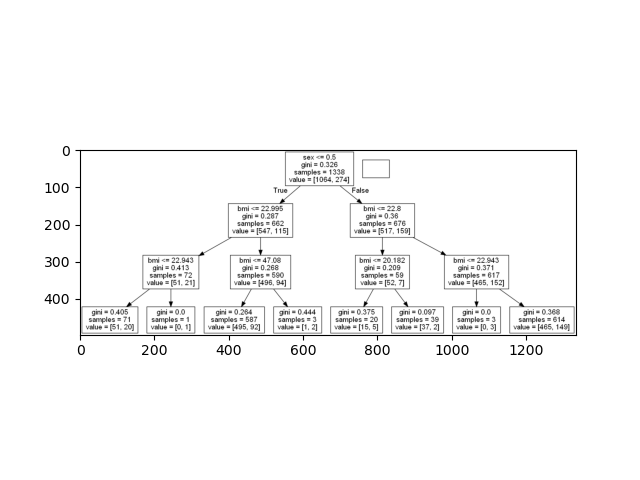

<function matplotlib.pyplot.show(block=None)>

In [9]:
"""
    pltimg.imread(): función que permite leer la imagen en la ubicación del notebook
                     envia por parametro el nombre del archivo
    imshow(): permite mostrar la imagen una vez se la obtenido
"""
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show

In [10]:
y_pred = dtree.predict(X)
print(y_pred)

[0 0 0 ... 0 0 0]


In [11]:
"""
 CONFUSION_MATRIX(): permite generar la matriz de confusión en base a las variables dependientes
"""
matrizConfu = confusion_matrix(y, y_pred)

In [12]:
"""
 cm_df: crea un Dataframe con la matriz obtenida especificando como indicadores las predicciones
        y los valores actuales de ingreso.
"""
cm_df = pandas.DataFrame(matrizConfu,
                     index = ['Fuma', 'No Fuma'], 
                     columns = ['Fuma', 'No Fuma'])

<IPython.core.display.Javascript object>


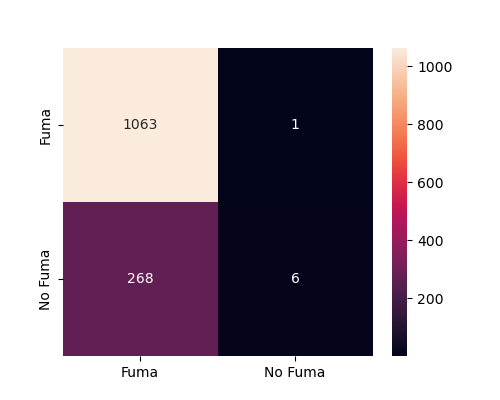

In [13]:
"""
    plt.figure(): genera la grafica en la cual se insertara la matriz
    sn.heatmap(): Crea la matriz en base a los elementos guardados en el dataframe
    plt.show(): muestra la grafica generada.
    
"""
plt.figure(figsize=(5,4))
sn.heatmap(cm_df, annot=True,fmt='g')
plt.show()